<a href="https://colab.research.google.com/github/Praveena-TP-13/ML-assignment-2/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
# Import libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [191]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#Verify
#!ls /content/drive/My\ Drive/


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [192]:
# Read the content in the .csv file

# Define the data file paths
file_path_1 = '/content/drive/My Drive/ml_ass2_datasets/dataset1.csv'
file_path_2 = '/content/drive/My Drive/ml_ass2_datasets/dataset2.csv'

# Read .csv files using pandas
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Display initial data
display(df1.head())
display(df2.head())


,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Data Preprocessing**

In [131]:
# Combine datasets
#df = pd.concat([df1, df2], ignore_index=True)

In [195]:
# Check missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

# print(df.isnull().sum())

Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownership(car)         0
Occupation                     0
Residence_City                 0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [194]:
# remove any leading or trailing whitespace from the column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [198]:
# Rename loan_status to Loan_Status for dataframe 1
if 'Loan_Default_Risk' in df1.columns:
    df1.rename(columns={'Loan_Default_Risk': 'Loan_Status'}, inplace=True)
    print("Renamed column 'Loan_Default_Risk' to 'Loan_Status' in dataframe 1.")
else:
    print("'Loan_Default_Risk' column not found in dataframe 1 and cannot rename")

# Display updated columns in df1
print("Columns in df1:")
print(df1.columns)

'Loan_Default_Risk' column not found in dataframe 1 and cannot rename
Columns in df1:
Index(['Applicant_ID', 'Annual_Income', 'Applicant_Age', 'Work_Experience',
       'Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)',
       'Occupation', 'Residence_City', 'Residence_State',
       'Years_in_Current_Employment', 'Years_in_Current_Residence',
       'Loan_Status'],
      dtype='object')


In [199]:
# Rename loan_status to Loan_Status for dataframe 2
if 'loan_status' in df2.columns:
    df2.rename(columns={'loan_status': 'Loan_Status'}, inplace=True)
    print("Renamed column 'loan_status' to 'Loan_Status' in dataframe 2.")
else:
    print("'loan_status' column not found in dataframe 2 and cannot rename")

# Display columns in df2
print("\nColumns in df2:")
print(df2.columns)

'loan_status' column not found in dataframe 2 and cannot rename

Columns in df2:
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'Loan_Status'],
      dtype='object')


In [200]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [207]:
display(df2.head())

# Change Loan_Status in df2 to 1 for Approved and 0 for Rejected
if 'Loan_Status' in df2.columns:
  # Strip leading/trailing spaces before replacing and converting to int
  df2['Loan_Status'] = df2['Loan_Status'].str.strip().replace({'Approved': 1, 'Rejected': 0}).astype(int)



# Display the modified df2 to check the changes
display(df2.head())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Loan_Status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


AttributeError: Can only use .str accessor with string values!

In [153]:
# Check missing values

def preprocess_data(df):
    # Display first few rows of data
    print(df.head())

    # Check for missing values
    print(df.isnull().sum())

    # Handling missing values (for simplicity, fill numeric NaNs with the median and categorical NaNs with mode)
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

    # Standardize numerical features
    scaler = StandardScaler()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df

df1_processed = preprocess_data(df1)
df2_processed = preprocess_data(df2)

   Applicant_ID  Annual_Income  Applicant_Age  Work_Experience Marital_Status  \
0         75722        9657655             76                0         single   
1         80185        9259353             37               18         single   
2         19865        1509721             66                8         single   
3         76700        5867312             43                1         single   
4         92992        7223191             44                9         single   

  House_Ownership Vehicle_Ownership(car)              Occupation  \
0          rented                     no            Psychologist   
1          rented                     no      Petroleum_Engineer   
2          rented                     no                 Drafter   
3           owned                     no    Chartered_Accountant   
4          rented                     no  Air_traffic_controller   

  Residence_City Residence_State  Years_in_Current_Employment  \
0      Jalandhar          Punjab       

**Handling Outliers**

In [156]:
# Detect and handle outliers using IQR
def handle_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Option 1: Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Option 2: Cap/floor outliers
    # Uncomment the following lines if you prefer to cap outliers
    # df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df

# List of numerical columns to check in each dataset
numerical_columns_df1 = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Years_in_Current_Employment', 'Years_in_Current_Residence', 'Loan_Status']
numerical_columns_df2 = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'Loan_Status']

# Handle outliers in df1
for col in numerical_columns_df1:
    df1 = handle_outliers_iqr(df1, col)

# Handle outliers in df2
for col in numerical_columns_df2:
    df2 = handle_outliers_iqr(df2, col)

Number of outliers in Annual_Income: 0
Number of outliers in Applicant_Age: 0
Number of outliers in Work_Experience: 0
Number of outliers in Years_in_Current_Employment: 0
Number of outliers in Years_in_Current_Residence: 0
Number of outliers in Loan_Status: 0
Number of outliers in income_annum: 0
Number of outliers in loan_amount: 0
Number of outliers in loan_term: 0
Number of outliers in cibil_score: 0
Number of outliers in residential_assets_value: 16
Number of outliers in commercial_assets_value: 17
Number of outliers in luxury_assets_value: 0
Number of outliers in bank_asset_value: 6
Number of outliers in Loan_Status: 0


In [208]:
# Display columns and data types for each dataset
for i, dataset in enumerate([df1, df2], start=1):
    print(f"\nDataset {i} - Columns and Data Types:\n{dataset.dtypes}")


Dataset 1 - Columns and Data Types:
Applicant_ID                    int64
Annual_Income                   int64
Applicant_Age                   int64
Work_Experience                 int64
Marital_Status                 object
House_Ownership                object
Vehicle_Ownership(car)         object
Occupation                     object
Residence_City                 object
Residence_State                object
Years_in_Current_Employment     int64
Years_in_Current_Residence      int64
Loan_Status                     int64
dtype: object

Dataset 2 - Columns and Data Types:
loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int6

**Visualize Data**

In [209]:
sns.set(style="whitegrid")

# Function to plot numerical columns
def plot_numerical(df, title):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Function to plot categorical columns
def plot_categorical(df, title):
    categorical_columns = df.select_dtypes(include=['object']).columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(len(categorical_columns) // 3 + 1, 3, i)
        sns.countplot(x=col, data=df)
        plt.title(f"Count of {col}")
        plt.xticks(rotation=45)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


Visualizing df1


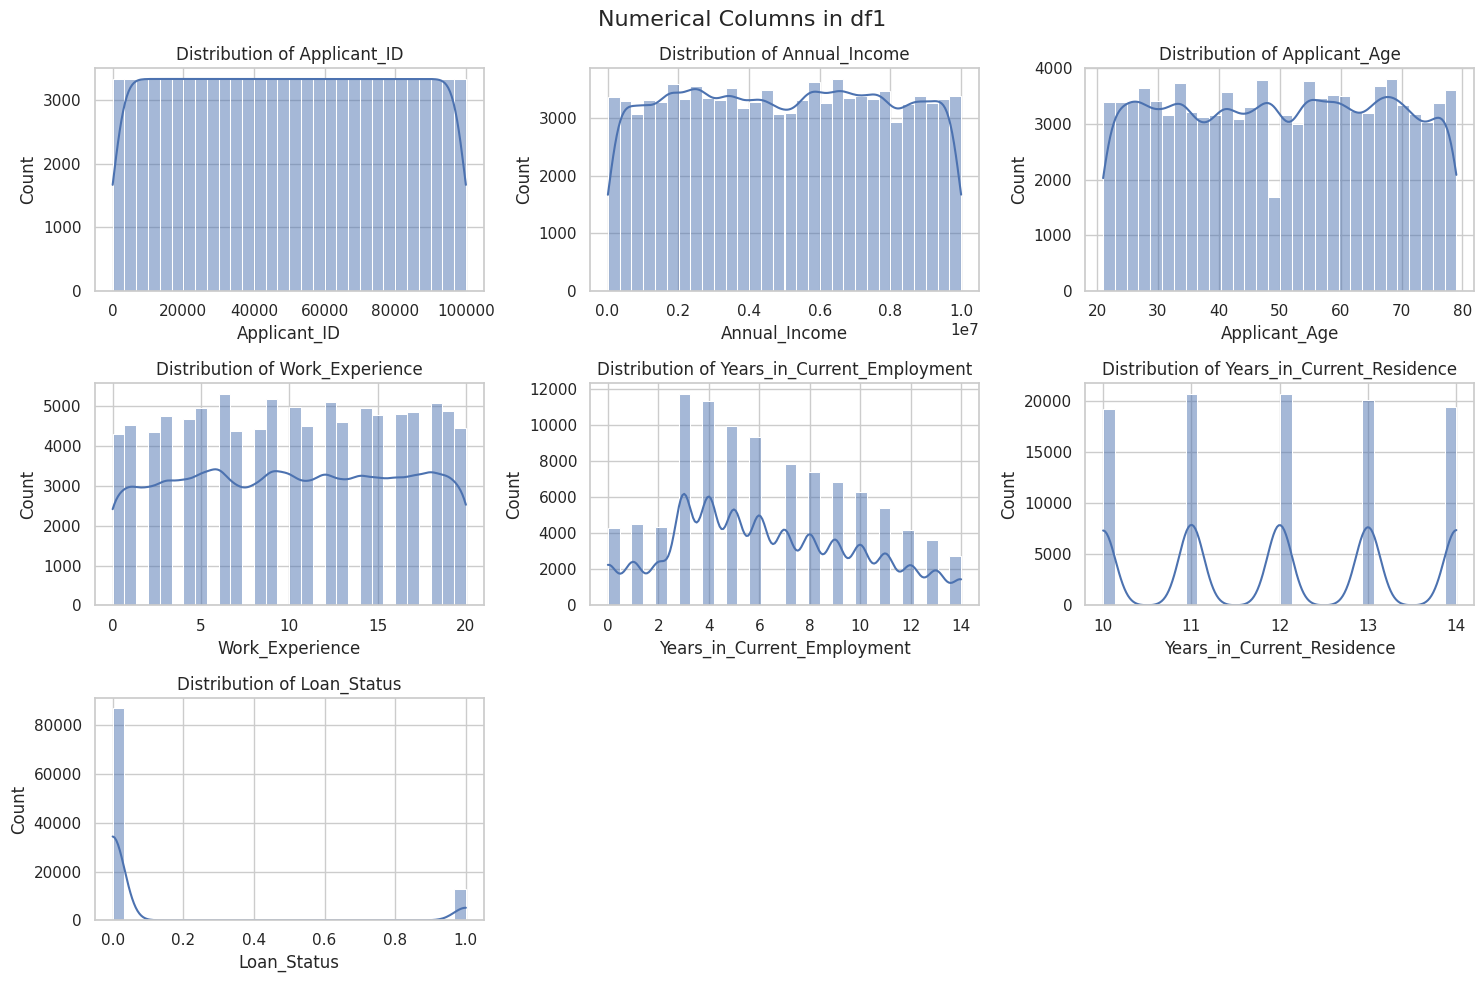

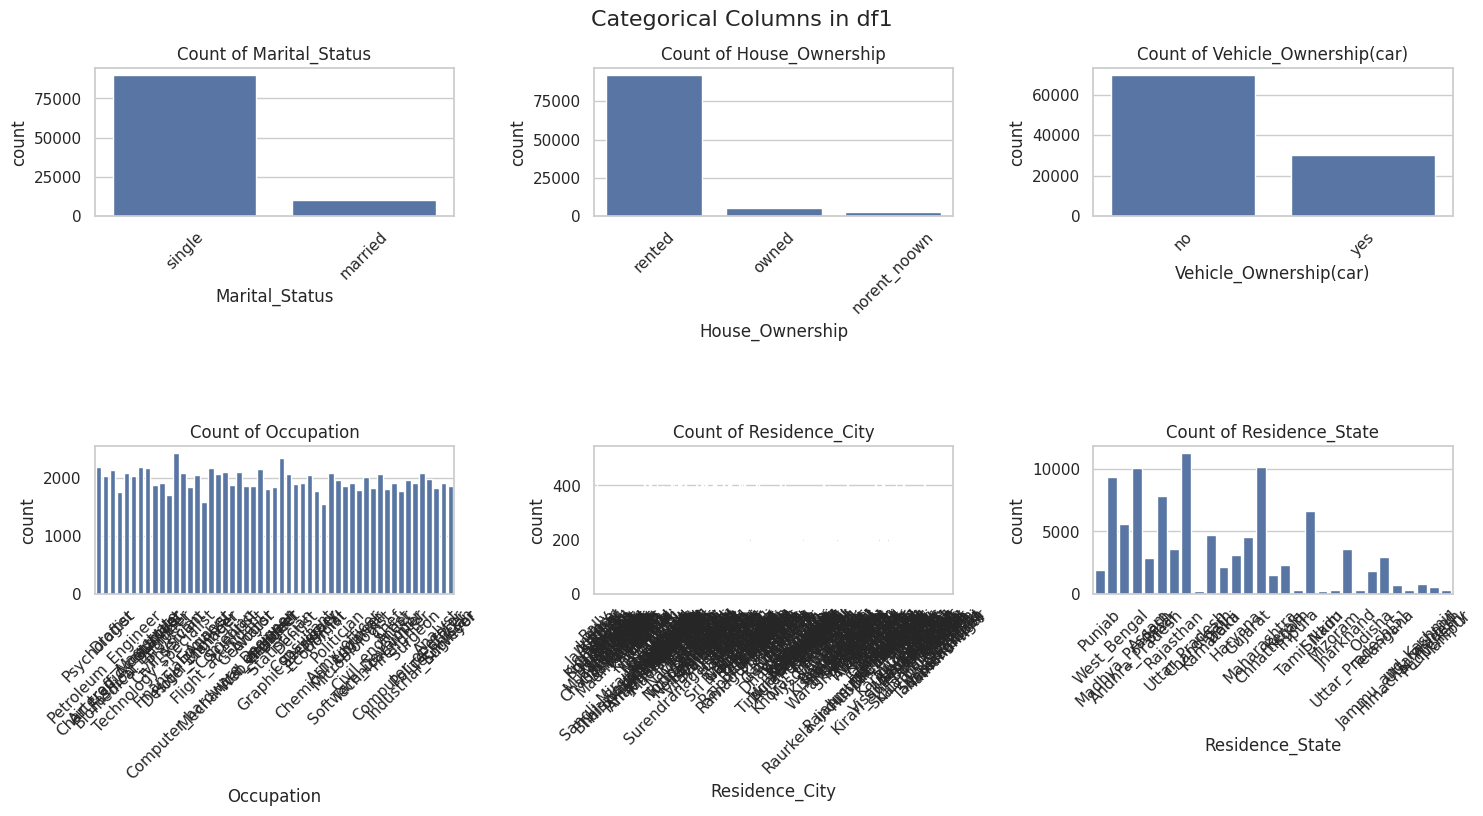

In [210]:
# Plotting columns in df1
print("Visualizing df1")
plot_numerical(df1, title="Numerical Columns in df1")
plot_categorical(df1, title="Categorical Columns in df1")

Visualizing df2


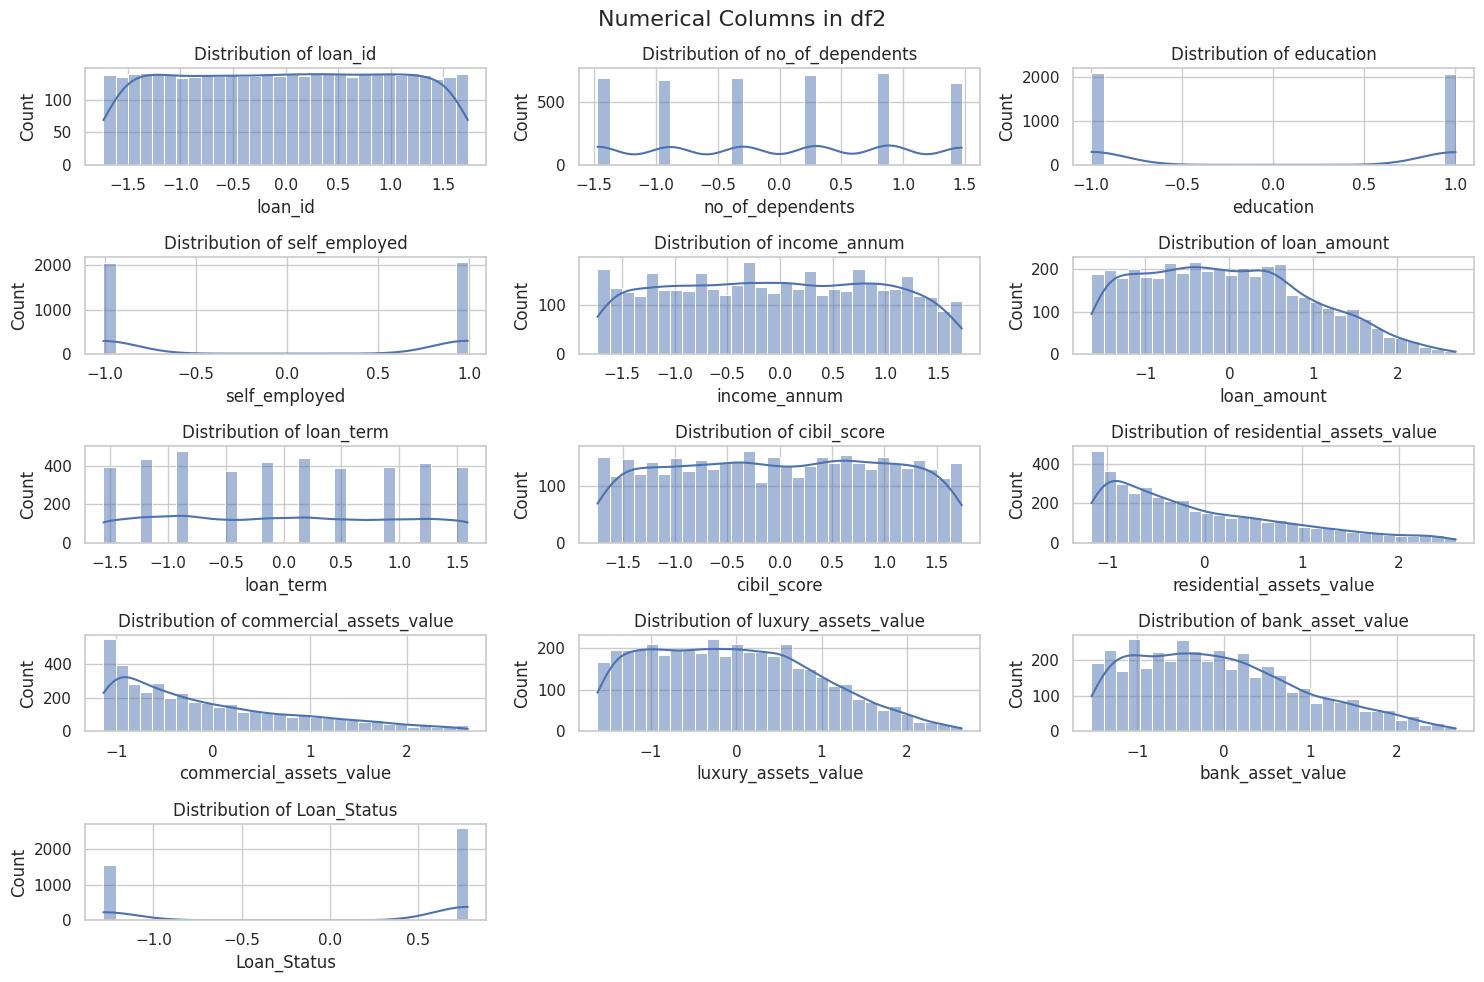

<Figure size 1500x1000 with 0 Axes>

In [160]:
# Plotting columns in df2
print("Visualizing df2")
plot_numerical(df2, title="Numerical Columns in df2")
plot_categorical(df2, title="Categorical Columns in df2")

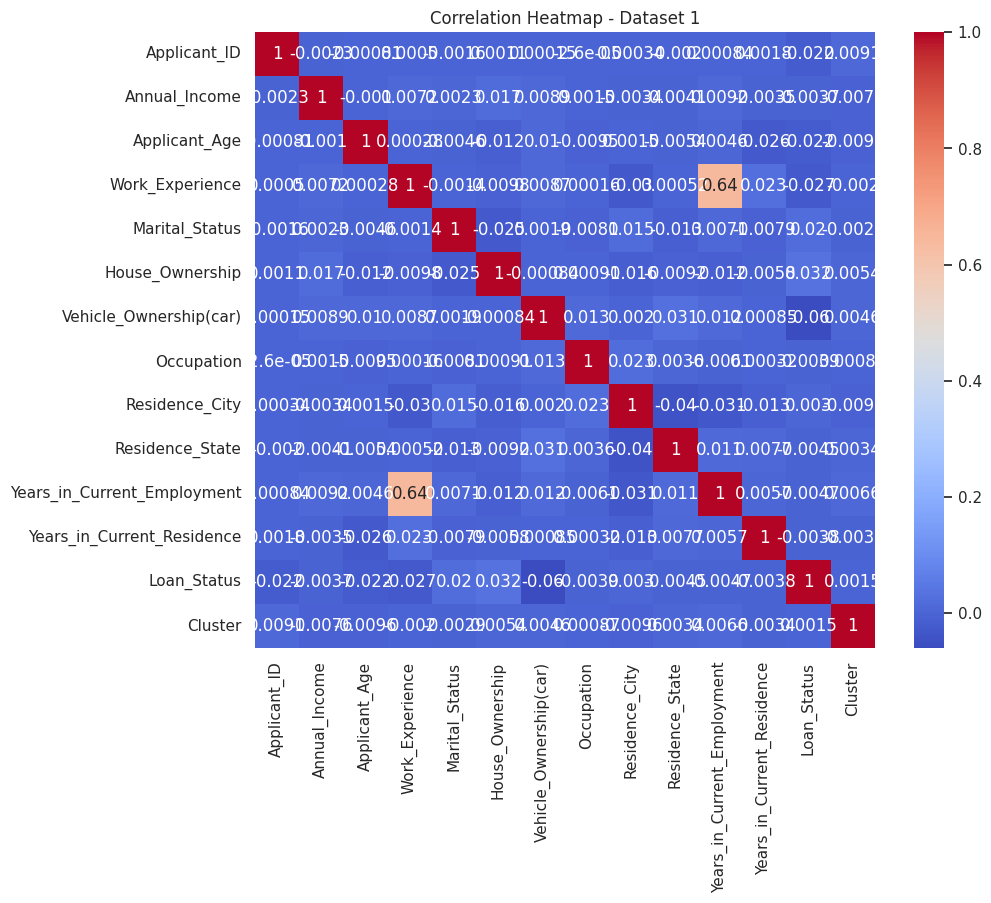

In [211]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1_processed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Dataset 1')
plt.show()

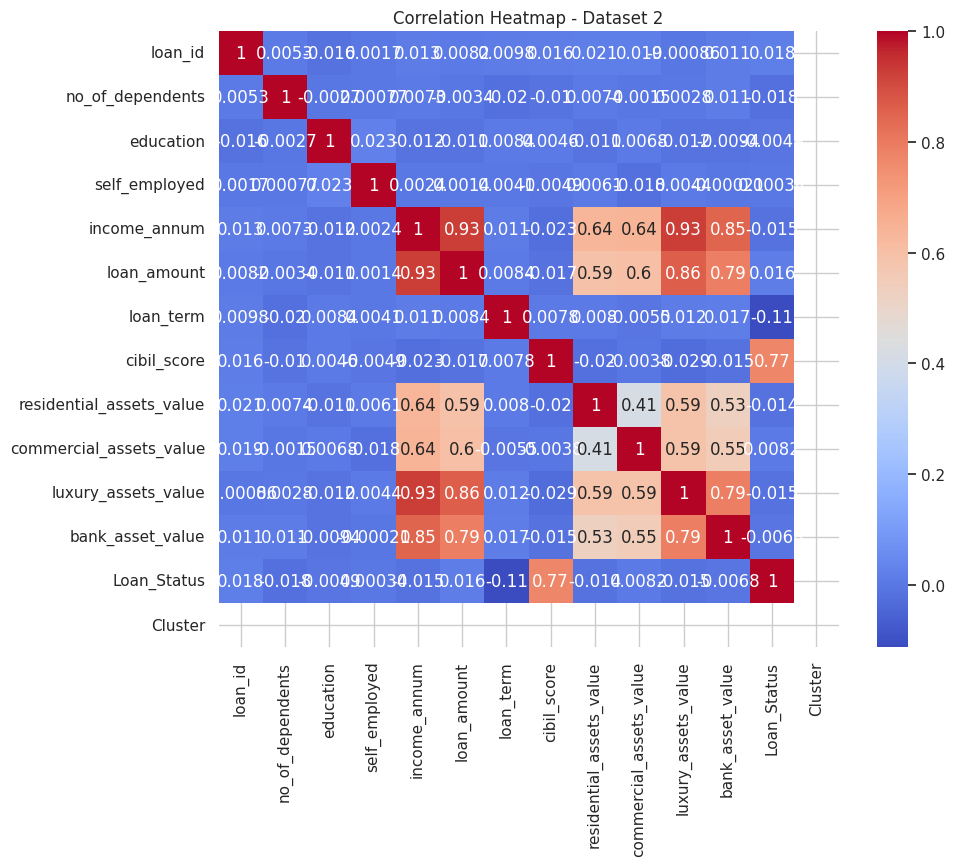

In [212]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2_processed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Dataset 2')
plt.show()

**Evaluate Datasets**

In [163]:
from imblearn.over_sampling import SMOTE

# Prepare data for modeling for both datasets
def prepare_data(df):
    if 'Loan_Status' not in df.columns:
        raise ValueError("Target variable 'Loan_Status' is not present in the DataFrame.")
        return None

    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']

    # Check if y has more than one unique value
    if len(y.unique()) < 2:
      #Instead of raising an error, print a warning and return None
      print(f"Warning: Target variable 'Loan_Status' has only one class: {y.unique()[0]}. Logistic Regression requires at least two classes.")
      return None, None, None, None  # Return None for all values

    # Split the dataset into training and testing sets
    return train_test_split(X, y, test_size=0.3, random_state=42)

    # Applying SMOTE for oversampling on the training data only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    return X_train_resampled, X_test, y_train_resampled, y_test



In [213]:
from sklearn.metrics import roc_auc_score

**DBSCAN**

In [214]:
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def map_clusters_to_labels(clusters, true_labels):
    # Create a mapping from cluster labels to true labels
    cluster_label_mapping = {}
    unique_clusters = np.unique(clusters)

    for cluster in unique_clusters:
        # Get the true labels for the points in this cluster
        points_in_cluster = true_labels[clusters == cluster]
        # Find the most common true label in this cluster
        most_common_label = Counter(points_in_cluster).most_common(1)[0][0]
        cluster_label_mapping[cluster] = most_common_label

    return cluster_label_mapping

def evaluate_dbscan(X, df, dataset_name):
    # Standardizing features
    X_scaled = StandardScaler().fit_transform(X)

    # Applying DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)

    # Add cluster predictions to the original dataset
    df['Cluster'] = clusters

    # Map clusters to actual labels
    if 'Loan_Status' in df.columns:
        true_labels = df['Loan_Status'].astype(int)  # Ensure labels are integers
        cluster_label_mapping = map_clusters_to_labels(clusters, true_labels)

        # Create an array of predicted labels based on the mapping
        predicted_labels = np.array([cluster_label_mapping.get(cluster, -1) for cluster in clusters])

        # Calculate accuracy only for the points that are not noise (-1)
        if np.any(predicted_labels != -1):  # Check if there are any points not labeled as noise
            accuracy = accuracy_score(true_labels[clusters != -1], predicted_labels[clusters != -1])
            cm = confusion_matrix(true_labels[clusters != -1], predicted_labels[clusters != -1])

            print(f'Accuracy for DBSCAN on {dataset_name}: {accuracy:.4f}')
            print('Confusion Matrix:')
            print(cm)
        else:
            print(f'No valid clusters found for {dataset_name}. Cannot evaluate accuracy.')

# Evaluate DBSCAN for both datasets
if 'Loan_Status' in df1_processed.columns:
    X_train_dbscan = df1_processed.drop('Loan_Status', axis=1)
    evaluate_dbscan(X_train_dbscan, df1_processed, "Dataset 1")

if 'Loan_Status' in df2_processed.columns:
    X_train_dbscan2 = df2_processed.drop('Loan_Status', axis=1)
    evaluate_dbscan(X_train_dbscan2, df2_processed, "Dataset 2")

Accuracy for DBSCAN on Dataset 1: 0.9429
Confusion Matrix:
[[70529  3473]
 [ 1382  9641]]
Accuracy for DBSCAN on Dataset 2: nan
Confusion Matrix:
[]


**KMeans Clustering**

Adjusted Rand Index for Dataset 1: 0.0001
Silhouette Score for Dataset 1: 0.6368


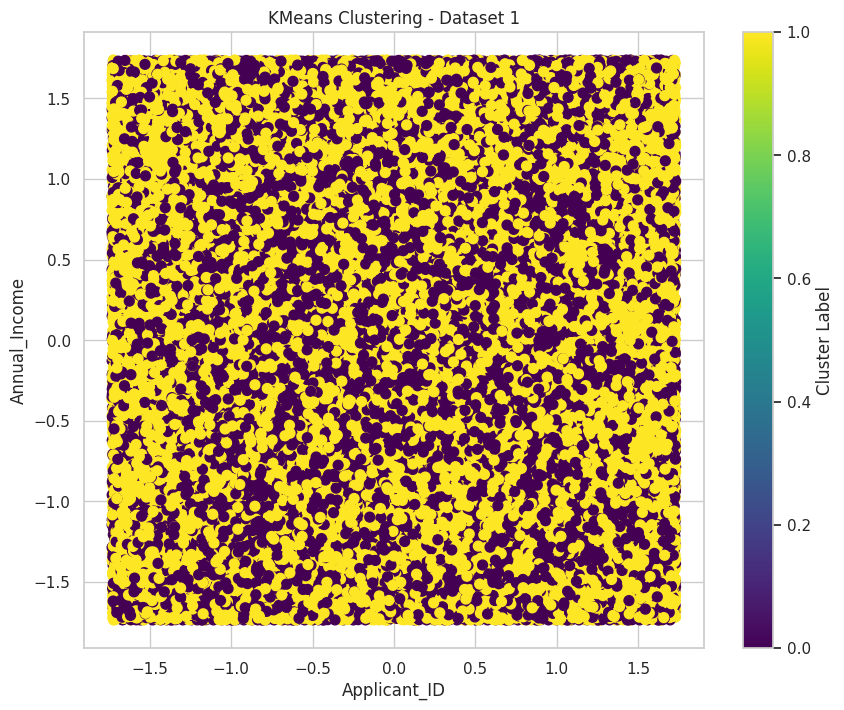

Adjusted Rand Index for Dataset 2: -0.0001
Silhouette Score for Dataset 2: 0.2286


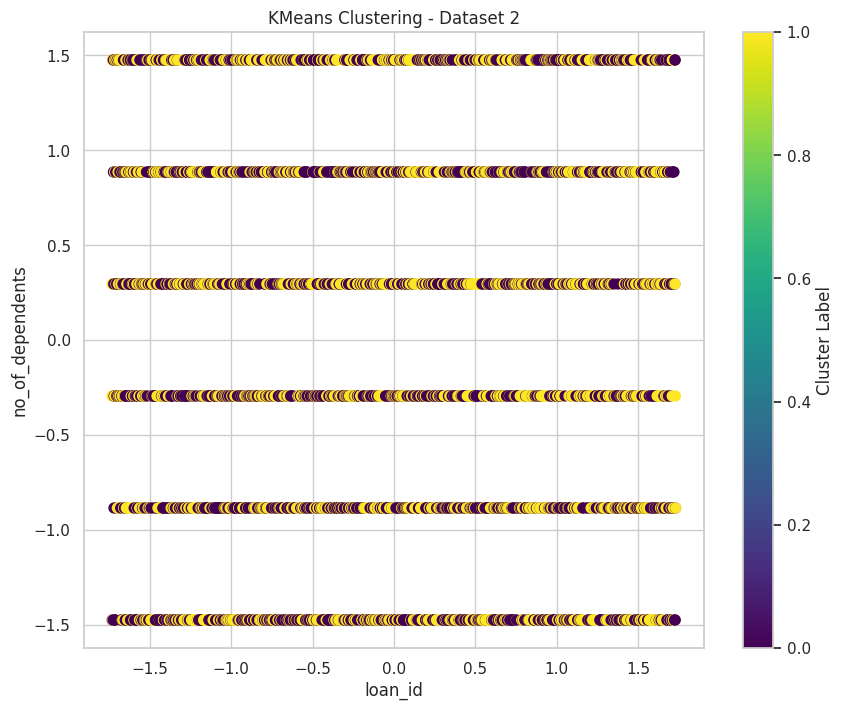

In [181]:
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np

def evaluate_kmeans(X, df, dataset_name):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Calculate the Adjusted Rand Index
    if 'Loan_Status' in df.columns:
        actual_labels = df['Loan_Status'].values
        ari = adjusted_rand_score(actual_labels, cluster_labels)
        print(f'Adjusted Rand Index for {dataset_name}: {ari:.4f}')
    else:
        print(f'No Loan_Status available in {dataset_name} for ARI calculation.')

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'Silhouette Score for {dataset_name}: {silhouette_avg:.4f}')

    # Optional: Visualizing the clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50)
    plt.title(f'KMeans Clustering - {dataset_name}')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.colorbar(label='Cluster Label')
    plt.show()

# Assuming df1_processed and df2_processed are your DataFrames
X_train_kmeans1 = df1_processed.drop('Loan_Status', axis=1)
evaluate_kmeans(X_train_kmeans1, df1_processed, "Dataset 1")

X_train_kmeans2 = df2_processed.drop('Loan_Status', axis=1)
evaluate_kmeans(X_train_kmeans2, df2_processed, "Dataset 2")

**XGBoost model**

In [215]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming df1_processed and df2_processed are already preprocessed DataFrames
# Change Loan_Status in df2 to 1 for Approved and 0 for Rejected if not done yet
if 'Loan_Status' in df2_processed.columns:
    df2_processed['Loan_Status'] = df2_processed['Loan_Status'].replace({'Approved': 1, 'Rejected': 0}).astype(int)

# Function to prepare data and train XGBoost model
def train_xgboost_model(df, dataset_name):
    if 'Loan_Status' not in df.columns:
        print(f"Error: 'Loan_Status' not found in {dataset_name}.")
        return

    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create an XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Ensure 'Loan_Status' is of type int and contains only 0 and 1
    y_train = y_train.astype(int)  # Convert to int
    y_train = y_train.clip(0, 1)  # Clip values to 0 or 1

    # Ensure y_test is also of type int and contains only 0 and 1
    y_test = y_test.astype(int)
    y_test = y_test.clip(0, 1) #This line ensures that y_test only has values 0 and 1

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Accuracy for {dataset_name}: {accuracy:.4f}")
    print(f"Classification Report for {dataset_name}:\n{report}")
    print(f"Confusion Matrix for {dataset_name}:\n{confusion}")

# Train XGBoost for both datasets
train_xgboost_model(df1_processed, "Dataset 1")
train_xgboost_model(df2_processed, "Dataset 2")

Accuracy for Dataset 1: 0.9521
Classification Report for Dataset 1:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     26159
           1       0.97      0.65      0.78      3841

    accuracy                           0.95     30000
   macro avg       0.96      0.82      0.87     30000
weighted avg       0.95      0.95      0.95     30000

Confusion Matrix for Dataset 1:
[[26076    83]
 [ 1354  2487]]
Accuracy for Dataset 2: 1.0000
Classification Report for Dataset 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1281

    accuracy                           1.00      1281
   macro avg       1.00      1.00      1.00      1281
weighted avg       1.00      1.00      1.00      1281

Confusion Matrix for Dataset 2:
[[1281]]
